In [2]:
!pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 43.9 MB/s eta 0:00:00


In [3]:
from PIL import Image
import torch
from diffusers import StableDiffusionInpaintPipeline
import matplotlib.pyplot as plt
import numpy as np

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [8]:
def add_suit_to_person(image_path, mask_path, output_path, prompt):
    image = Image.open(image_path).convert("RGB")
    mask_image = Image.open(mask_path).convert("RGB")


    pipe = StableDiffusionInpaintPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-inpainting",
        torch_dtype=torch.float16,
    )
    pipe.to("cuda")

    result = pipe(prompt=prompt, image=image, mask_image=mask_image).images[0]

    result.save(output_path)

    display_images(image_path, mask_path, output_path)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

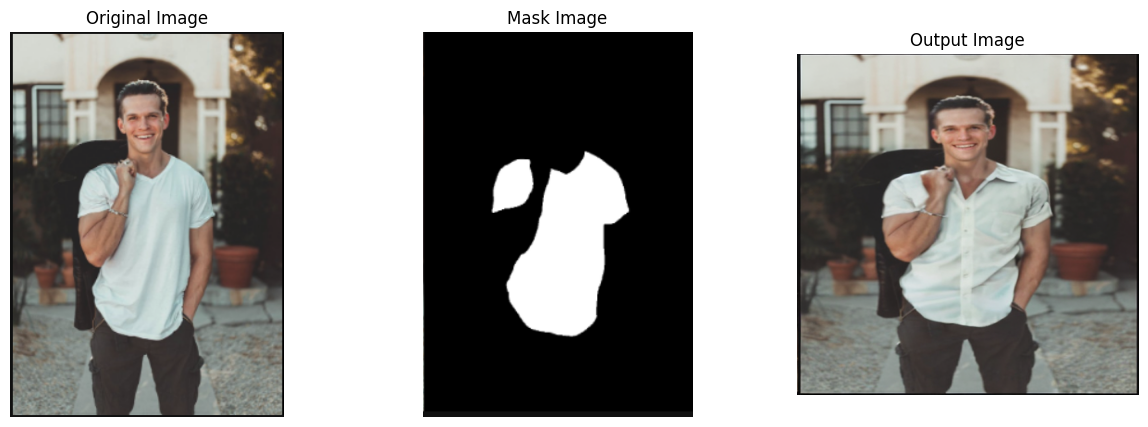

In [7]:
def display_images(image_path, mask_path, output_path):
    # Load images
    image = Image.open(image_path)
    mask_image = Image.open(mask_path)
    result_image = Image.open(output_path)

    # Create a figure to display images
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Display the original image
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis('off')

    # Display the mask image
    ax[1].imshow(mask_image, cmap='gray')  # Use 'gray' colormap for mask
    ax[1].set_title("Mask Image")
    ax[1].axis('off')

    # Display the result image
    ax[2].imshow(result_image)
    ax[2].set_title("Output Image")
    ax[2].axis('off')

    plt.show()

# Example function usage
add_suit_to_person("/content/real_img.png", "/content/mask_for_tshirt.png", "output_with_suit.png")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

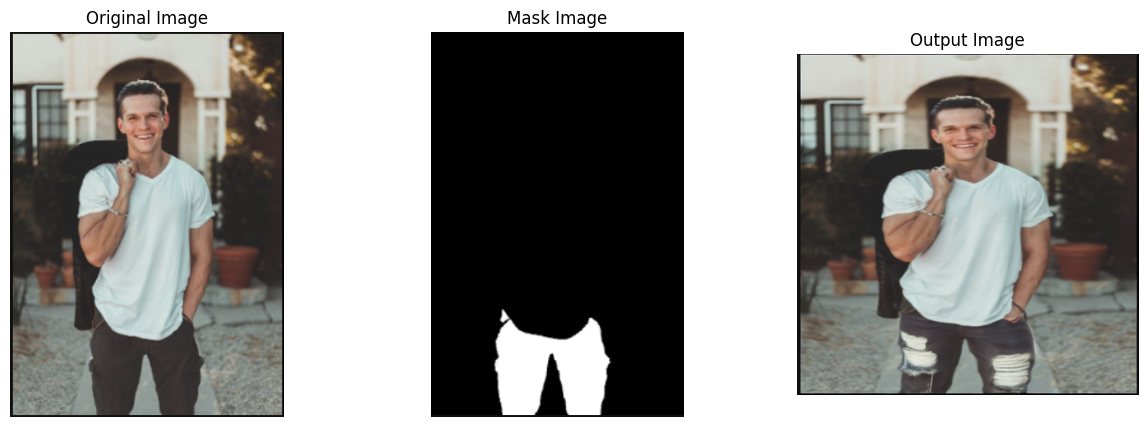

In [13]:
add_suit_to_person("/content/real_img.png", "/content/mask_for_jeans.png", "jeans.png", prompt="jeans torn near the knees")